In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
url = 'https://cloud.vinhthanh.net/s/3MpCNPWDiH7reec/download/Property%20Sales%20of%20Melbourne%20City.csv'
data = pd.read_csv(url)

In [48]:
import numpy as np
from scipy.stats import moment, kurtosis
from pandas import DataFrame

# data = DataFrame({'Price':[10, 20, 30, 40, 50]})

std_dev = np.std(data['Price'], ddof=1)
phuongsai  = std_dev**2
tinhmomen = moment(data['Price'], moment=2)
kurtosis = np.mean((data['Price'] - np.mean(data['Price']))**4) / variance**2

print('Phương sai:', phuongsai)
print('Moment trung tâm thứ 2:', tinhmomen)
print('Độ dốc:', kurtosis)

Phương sai: 412063426191.1444
Moment trung tâm thứ 2: 412041026570.2381
Độ dốc: 13.368500000011776


câu 2


In [49]:
# Lọc bất động sản là nhà phố
data = data.query("Type == 't'")

# Lọc bất động sản có đầy đủ tọa độ
data = data.dropna(subset=['Lattitude', 'Longtitude'])

# Lọc bất động sản xây từ năm 2010 trở về sau
data = data.query('YearBuilt >= 2010')
data

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
29,40,Abbotsford,13/11 Nicholson St,3,t,900000,S,Beller,18/03/2017,2.5,...,2.0,2.0,0.0,NaN,2010.0,Yarra,-37.80930,144.99590,Northern Metropolitan,4019.0
52,66,Airport West,154 Halsey Rd,3,t,840000,PI,Nelson,3/09/2016,13.5,...,2.0,1.0,303.0,225.0,2016.0,Moonee Valley,-37.71800,144.87800,Western Metropolitan,3464.0
67,82,Airport West,2/252 Parer Rd,2,t,450000,S,Barry,7/05/2016,13.5,...,1.0,1.0,110.0,90.0,2015.0,Moonee Valley,-37.72160,144.87100,Western Metropolitan,3464.0
97,112,Airport West,3/7 South Rd,3,t,540000,SP,Nelson,18/06/2016,13.5,...,2.0,1.0,161.0,101.0,2010.0,Moonee Valley,-37.72310,144.88020,Western Metropolitan,3464.0
192,232,Altona,1/123 Blyth St,2,t,720000,S,hockingstuart,4/02/2016,13.8,...,1.0,2.0,292.0,125.0,2013.0,Hobsons Bay,-37.86870,144.81970,Western Metropolitan,5301.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18253,23372,Pascoe Vale,1B Braeside St,2,t,636500,S,Barry,26/08/2017,8.5,...,1.0,2.0,NaN,97.0,2012.0,NaN,-37.71874,144.95016,Northern Metropolitan,7485.0
18255,23374,Pascoe Vale,2/7 Joffre Rd,4,t,745000,S,Barry,26/08/2017,8.5,...,2.0,1.0,NaN,140.0,2010.0,NaN,-37.71884,144.93892,Northern Metropolitan,7485.0
18259,23378,Port Melbourne,44 Garton St,4,t,2455000,SP,Marshall,26/08/2017,3.5,...,3.0,2.0,123.0,0.0,2010.0,NaN,-37.83349,144.94840,Southern Metropolitan,8648.0
18385,23534,West Footscray,1/21 Waratah St,2,t,655000,S,Jas,26/08/2017,6.4,...,2.0,1.0,NaN,135.0,2012.0,NaN,-37.80968,144.86819,Western Metropolitan,5058.0


In [50]:
import plotly.graph_objs as go

h105 = data.iloc[90][['Bedroom2', 'Bathroom', 'Car']]
h106 = data.iloc[91][['Bedroom2', 'Bathroom', 'Car']]

fig = go.Figure(data= go.Parcoords(
            line=dict(color='blue'),
            dimensions=list([
                dict(label='Bedroom2', values=[h105['Bedroom2'], h106['Bedroom2']]),
                dict(label='Bathroom', values=[h105['Bathroom'], h106['Bathroom']]),
                dict(label='Car', values=[h105['Car'], h106['Car']])
            ])
    )
)

fig.update_layout(
    title='Tương quan giữa số phòng ngủ, số phòng tắm và số chỗ đậu xe của nhà 105 và 106'
)

fig.show()

bài 4


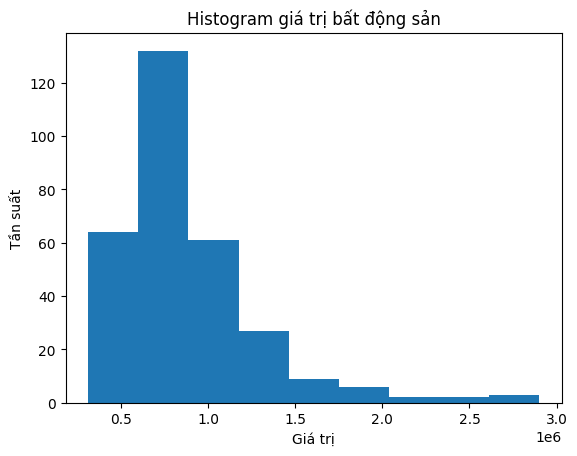

In [51]:
import matplotlib.pyplot as plt
import numpy as np

price = data['Price']
n = len(price)
k = 1 + int(np.log2(n))
bin_range = (price.max() - price.min()) / k
bin_min = price.min()
bin_max = price.max()
bin_width = bin_range

plt.hist(price, bins=k, range=(bin_min, bin_max), rwidth=bin_width)
plt.title('Histogram giá trị bất động sản')
plt.xlabel('Giá trị')
plt.ylabel('Tần suất')
plt.show()

Beta: 1.0939806545936475
Hệ số chặn: 67.53846717036109


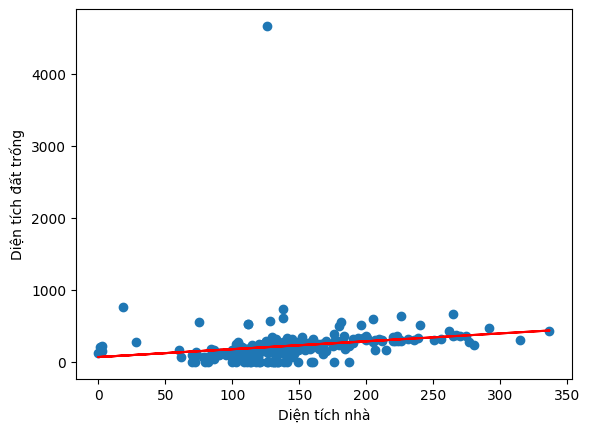

In [52]:
df_5 = data[(data['BuildingArea'].notna()) & (data['Landsize'].notna())]

x = df_5['BuildingArea']
y = df_5['Landsize']

coef = np.polyfit(x, y, 1)

print('Beta:', coef[0])
print('Hệ số chặn:', coef[1])

plt.scatter(x, y)
plt.plot(x, coef[0]*x + coef[1], color='red')
plt.xlabel('Diện tích nhà')
plt.ylabel('Diện tích đất trống')
plt.show()